# Focal colors in different language families

COG 260: Data, Computation, and The Mind Final project
Professor: Yang Xu

Authors: Kateryna-Mariia Blavt, Bohdan Hurskyi

Data sources:
http://www1.icsi.berkeley.edu/wcs/data.html

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1149449/


______________________________________________

## Part 1: Data preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy import stats
from random import random
%matplotlib inline
from wcs_helper_functions import *


Getting the data using helper functions

In [3]:
fociData = readFociData('./WCS_data_core/foci-exp.txt');
munsellInfo = readChipData('./WCS_data_core/chip.txt');
origin = pd.read_csv('./WCS_data_core/origin.txt', sep="	", header=None)

Here we discover our language families in order to choose the best for our research

In [4]:
origin.columns = ["index", "lang_name", "family", "country"]
origin

,index,lang_name,family,country
0,1,Abidji,Kwa,Ivory Coast
1,2,Agarabi,Trans-New Guinea,Papua New Guinea
2,3,Agta,Austronesian,Philippines
3,4,Aguacatec,Mayan,Guatemala
4,5,Amarakaeri,Arawakan,Peru
...,...,...,...,...
105,106,Yakan,Austronesian,Philippines
106,107,Yaminahua,Panoan,Peru
107,108,Yucuna,Arawakan,Colombia
108,109,Yupik,Eskimo-Aleut,United States


We have chosen: Oto-Manguean(Mexico), Austronesian(Philippines, Papua New Guinea), Gur(Ivory Coast, Ghana)

In [5]:
display(origin["family"].value_counts())
austr_list, oto_list, gur_list = list(origin[(origin["family"]=="Austronesian")]["index"]),list(origin[(origin["family"]=="Oto-Manguean")]["index"]),list(origin[(origin["family"]=="Gur")]["index"])
print(austr_list)
print(oto_list)
print(gur_list)

Austronesian                 6
Oto-Manguean                 6
Trans-New Guinea             6
Uto-Aztecan                  5
[creole]                     5
Gur                          5
Chibchan                     5
Indic                        5
Panoan                       4
Arawakan                     4
Macro-Ge                     3
Angan                        3
Mayan                        3
Tacanan                      3
East New Guinea Highlands    2
Bantoid                      2
Nilo-Sarahan                 2
Algonquian                   2
Pama-Nyungan                 2
Dani-Kwerba                  1
Tupi                         1
East Chadic                  1
Dan                          1
Martu-Wangka                 1
Muskogean                    1
Adamawa-Ubangi               1
Pirahá                       1
Niger-Congo                  1
Waorani                      1
Tucanoan                     1
Subtiaba-Tlapanec            1
Ticuna                       1
Murrinh-

[3, 48, 81, 89, 94, 106]
[7, 26, 67, 68, 72, 110]
[35, 56, 62, 77, 100]


The function to count the matrices of chips named as focal

In [6]:
def countFoci(list_of_indices):

    matr_world = np.zeros((10,41))
    for lang in list_of_indices:
        for speaker in fociData[lang]:
            for color in fociData[lang][speaker]:
                for cood in fociData[lang][speaker][color]:
                    coods = cood.split(":")
                    y,x = ord(coods[0])-65, int(coods[1])
                    matr_world[y][x] += 1
    matr_world[0][0] = 0
    matr_world[9][0] = 0
    return np.flipud(matr_world)



matr_oto = countFoci(oto_list)
matr_austr = countFoci(austr_list)
matr_gur = countFoci(gur_list)
matr_wcs = countFoci(fociData)
matr_gur

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 2.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.],
       [ 2.,  6.,  6.,  4.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
         1.,  1.,  1.,  0.,  1.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  7.,  7.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 3., 20., 25.,  9.,  1.,  2.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
         1.,  0.,  1.,  1.,  2.,  2.,  5.,  3.,  1.,  1.,  0.,  0.,  0.,
         1.,  1.,  6.,  5.,  7.,  0.,  1.,  1.,  0.,  2.,  5.,  5.,  7.,
        11., 13.],
       [ 3.,  6., 10.,  3.,  5.,  0.,  1.,  0., 

Pierson's Correlation

In [7]:
import inspect

def normalize(matr):
    return np.divide(matr, sum([sum(i) for i in matr]))


def correlation_coefficient(T1, T2):
    numerator = np.mean((T1 - T1.mean()) * (T2 - T2.mean()))
    denominator = T1.std() * T2.std()
    if denominator == 0:
        return 0
    else:
        result = numerator / denominator
        return round(result,4)

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

In [8]:
print("Correlation between the whole world data and Oto-Manguean language family:",correlation_coefficient(normalize(matr_wcs),normalize(matr_oto)))
print("Correlation between the whole world data and Austronesian language family:",correlation_coefficient(normalize(matr_wcs),normalize(matr_austr)))
print("Correlation between the whole world data and Gur language family:",correlation_coefficient(normalize(matr_wcs),normalize(matr_gur)))

Correlation between the whole world data and Oto-Manguean language family: 0.8722
Correlation between the whole world data and Austronesian language family: 0.9182
Correlation between the whole world data and Gur language family: 0.8295


Some combinations of our languages to notice some interesting coincidences

In [14]:
langlist = [matr_oto,matr_austr,matr_gur]
for i, a in enumerate(langlist):
    for b in langlist[i:]:
        print(correlation_coefficient(normalize(a), normalize(b)), retrieve_name(a),retrieve_name(b))

1.0 ['matr_oto', 'a', 'b'] ['matr_oto', 'a', 'b']
0.8132 ['matr_oto', 'a'] ['matr_austr', 'b']
0.6852 ['matr_oto', 'a'] ['matr_gur', '_6', 'b']
1.0 ['matr_austr', 'a', 'b'] ['matr_austr', 'a', 'b']
0.7947 ['matr_austr', 'a'] ['matr_gur', '_6', 'b']
1.0 ['matr_gur', '_6', 'a', 'b'] ['matr_gur', '_6', 'a', 'b']


## Part 2: Data visualization


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0, 0.0, 'j'),
  Text(0, 1.0, 'i'),
  Text(0, 2.0, 'h'),
  Text(0, 3.0, 'g'),
  Text(0, 4.0, 'f'),
  Text(0, 5.0, 'e'),
  Text(0, 6.0, 'd'),
  Text(0, 7.0, 'c'),
  Text(0, 8.0, 'b'),
  Text(0, 9.0, 'a')])

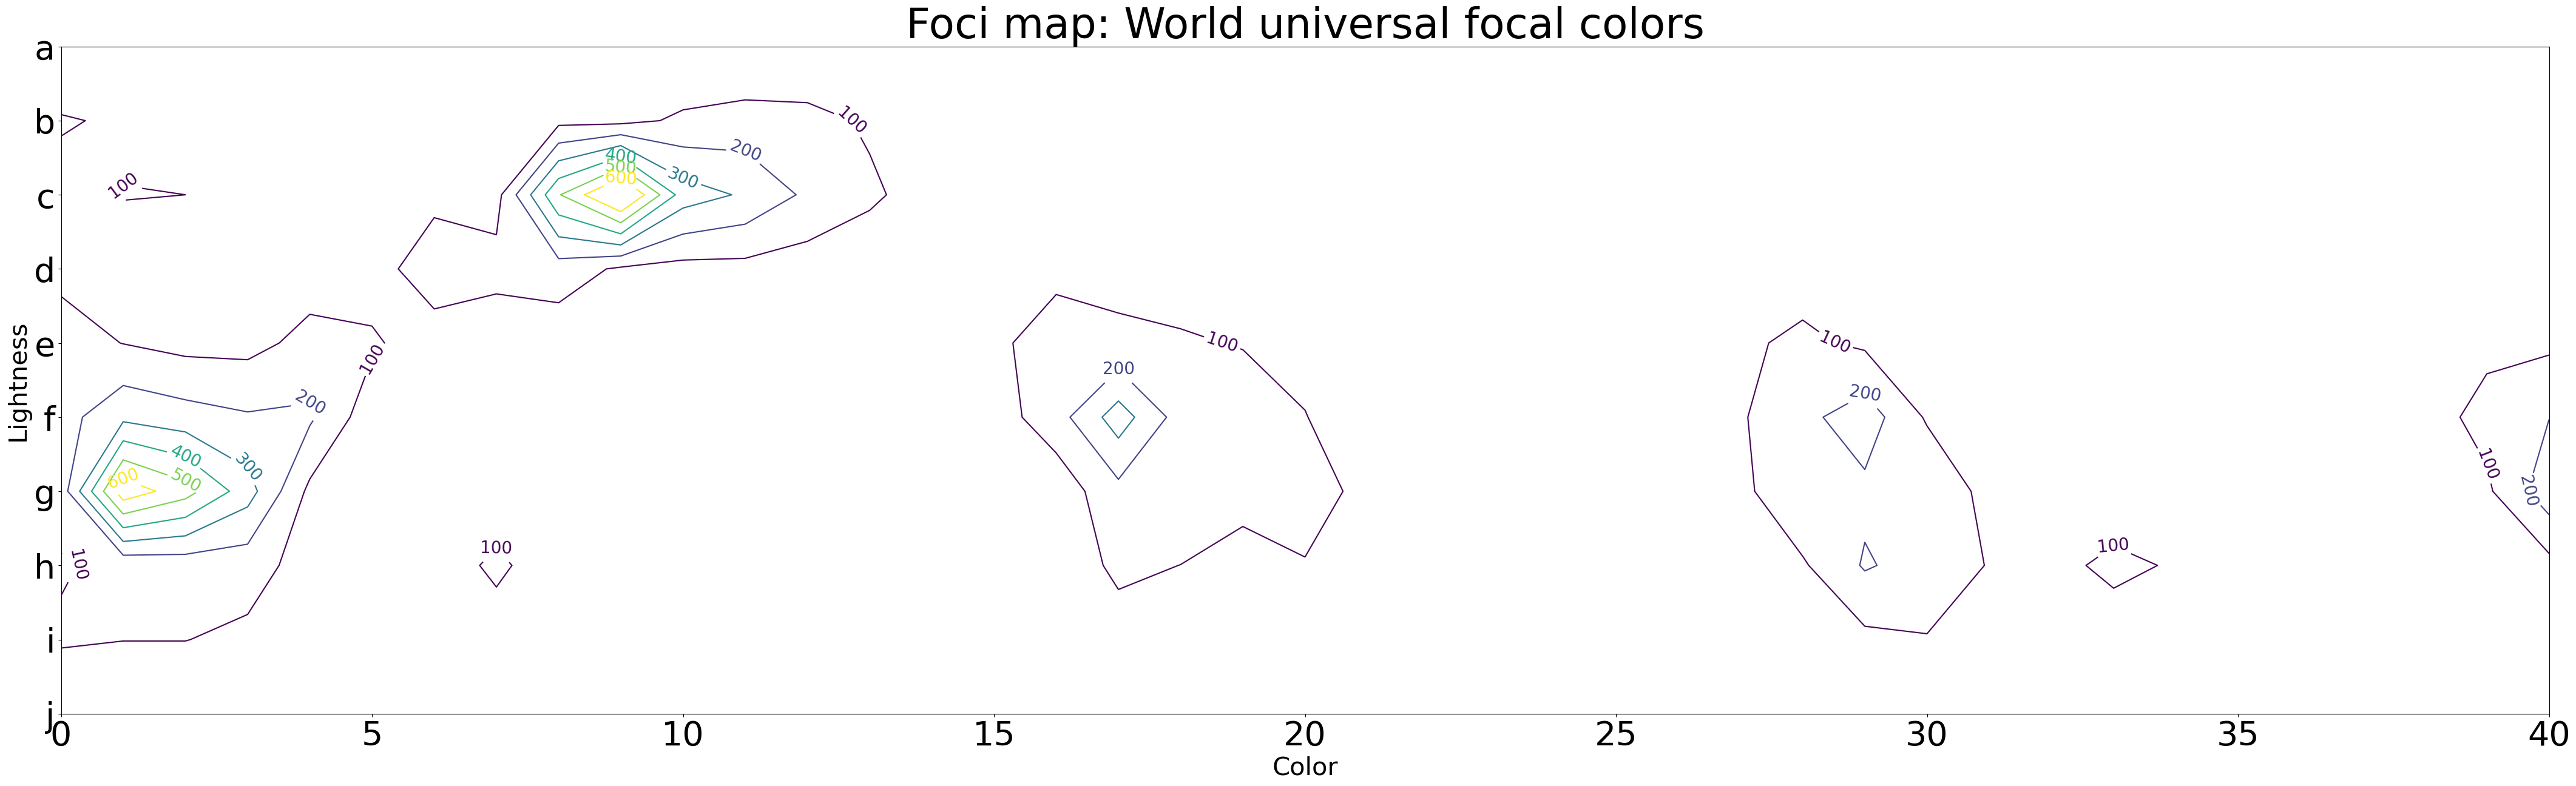

In [10]:
X, Y = np.meshgrid(range(0,41), range(0,10))
fig = plt.figure(figsize=(41, 11))
ax = fig.add_axes([1,1,1,1])
cp = ax.contour(X, Y, matr_wcs, levels=[100,200,300,400,500,600])
ax.clabel(cp, inline=True, fontsize=20)
ax.set_yticklabels(["j","i","h","g","f","e","d","c","b","a"])
ax.set_title('Foci map: World universal focal colors',fontsize=50)
ax.set_xlabel('Color',fontsize = 30)
ax.set_ylabel('Lightness',fontsize = 30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0, 0.0, 'j'),
  Text(0, 1.0, 'i'),
  Text(0, 2.0, 'h'),
  Text(0, 3.0, 'g'),
  Text(0, 4.0, 'f'),
  Text(0, 5.0, 'e'),
  Text(0, 6.0, 'd'),
  Text(0, 7.0, 'c'),
  Text(0, 8.0, 'b'),
  Text(0, 9.0, 'a')])

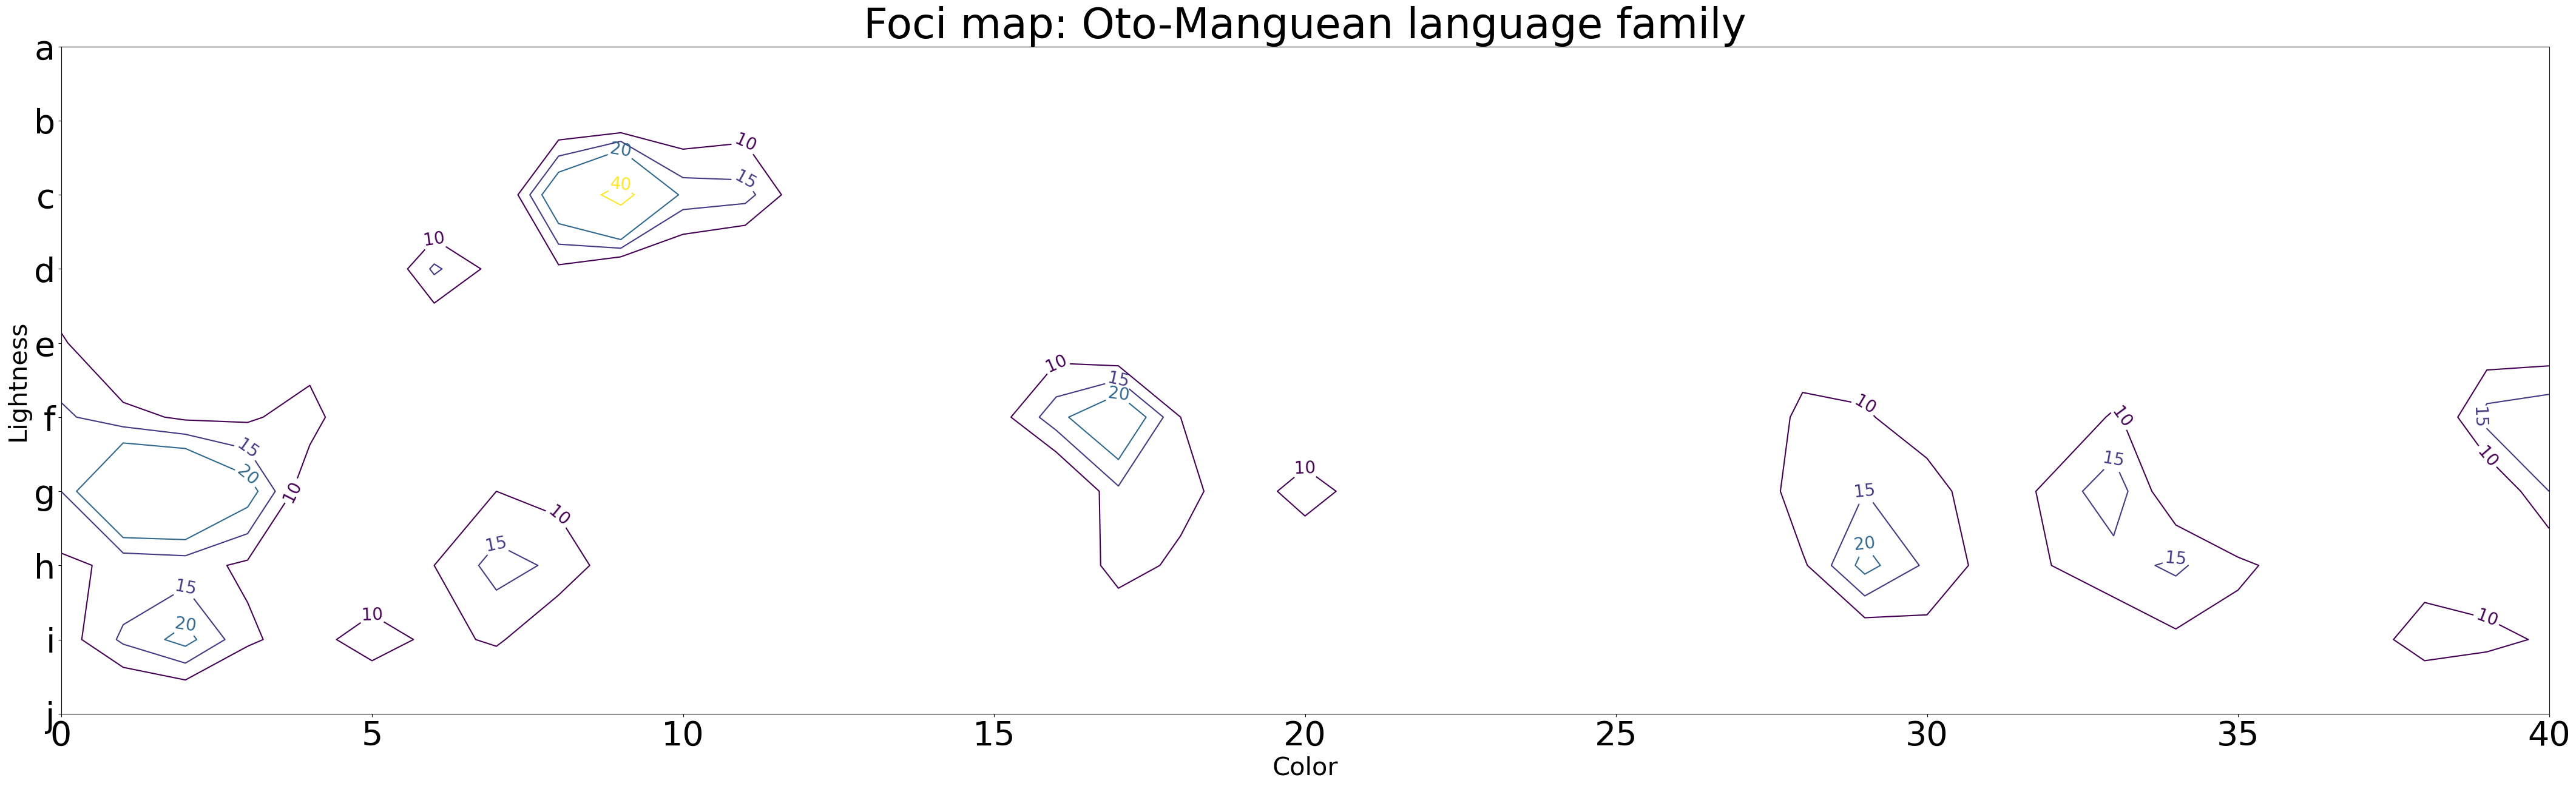

In [11]:
X, Y = np.meshgrid(range(0,41), range(0,10))
fig = plt.figure(figsize=(41, 11))
ax = fig.add_axes([1,1,1,1])

cp = ax.contour(X, Y, matr_oto,levels=[10,15,20,40])
ax.clabel(cp, inline=True, fontsize=20)
ax.set_yticklabels(["j","i","h","g","f","e","d","c","b","a"])
ax.set_title('Foci map: Oto-Manguean language family',fontsize=50)
ax.set_xlabel('Color',fontsize = 30)
ax.set_ylabel('Lightness',fontsize = 30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0, 0.0, 'j'),
  Text(0, 1.0, 'i'),
  Text(0, 2.0, 'h'),
  Text(0, 3.0, 'g'),
  Text(0, 4.0, 'f'),
  Text(0, 5.0, 'e'),
  Text(0, 6.0, 'd'),
  Text(0, 7.0, 'c'),
  Text(0, 8.0, 'b'),
  Text(0, 9.0, 'a')])

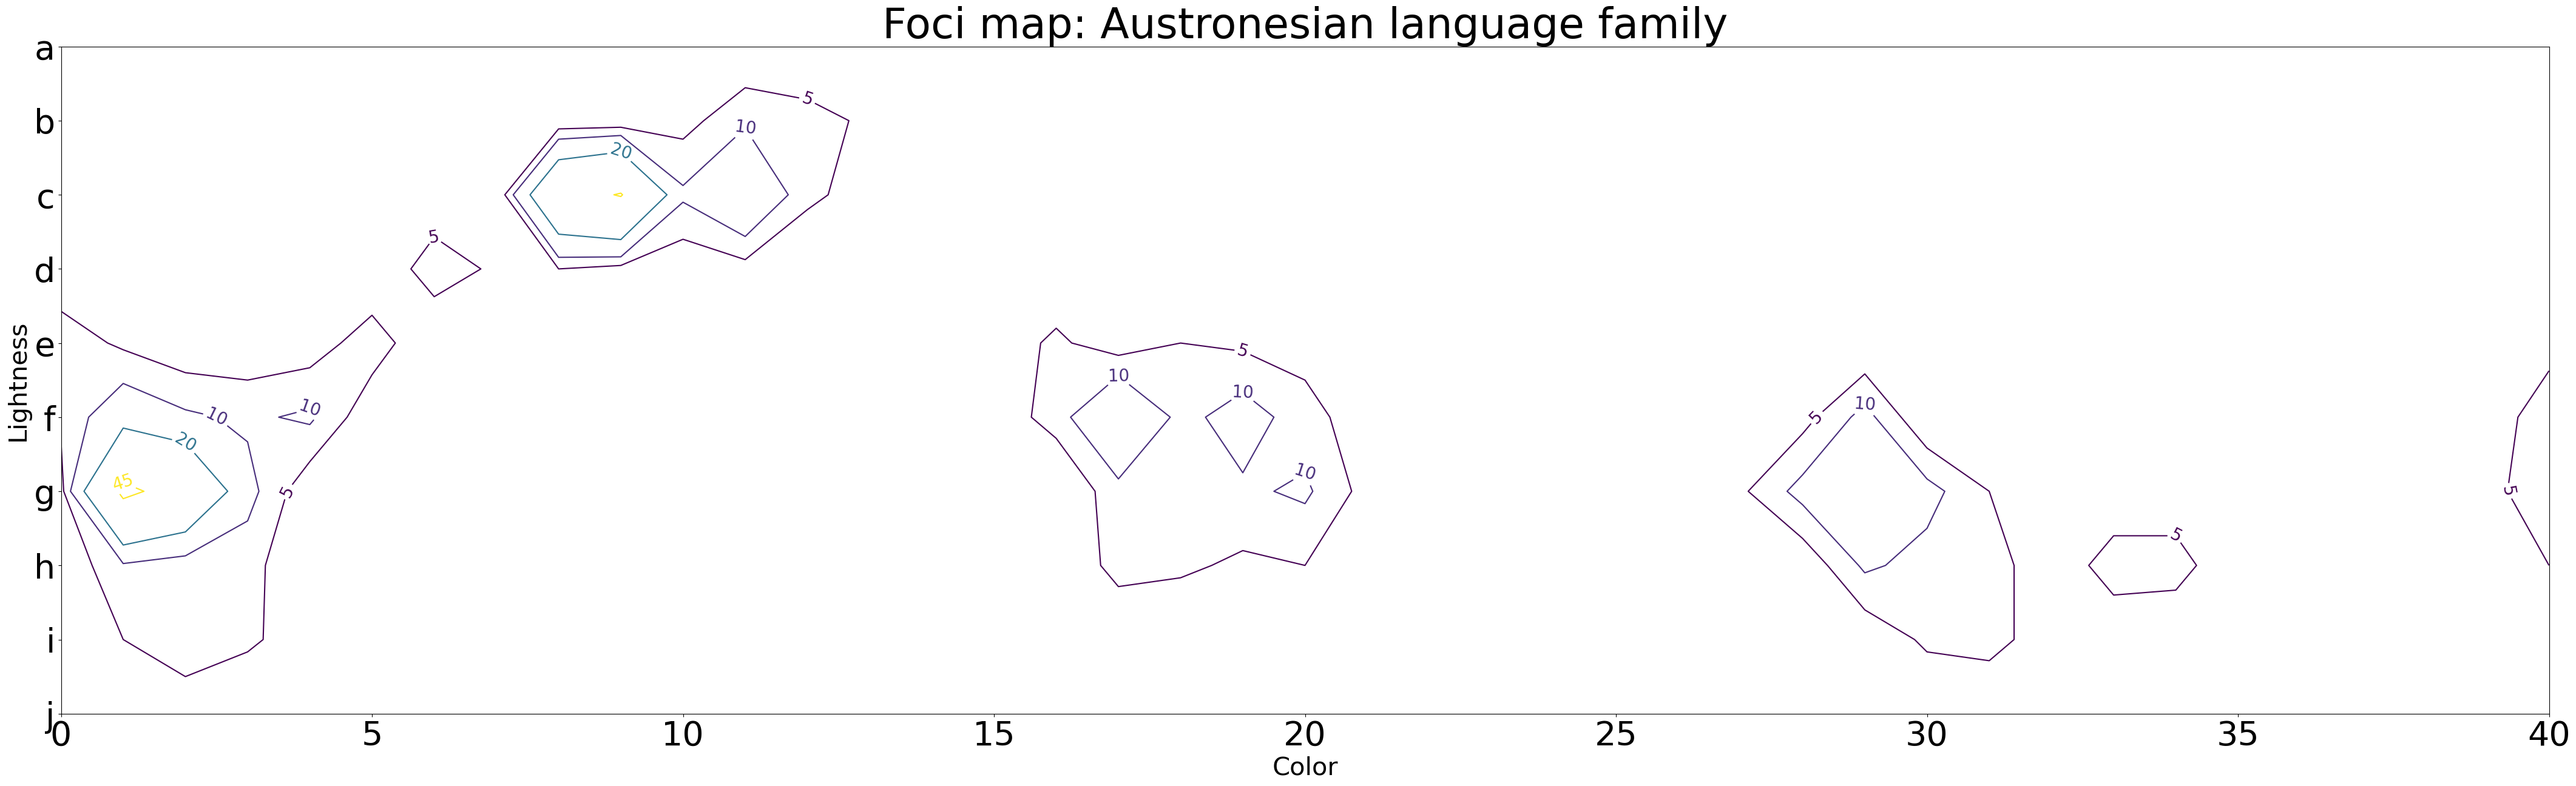

In [12]:
X, Y = np.meshgrid(range(0,41), range(0,10))
fig = plt.figure(figsize=(41, 11))
ax = fig.add_axes([1,1,1,1])

cp = ax.contour(X, Y, matr_austr,levels=[5,10,20,45])
ax.clabel(cp, inline=True, fontsize=20)
ax.set_yticklabels(["j","i","h","g","f","e","d","c","b","a"])
ax.set_title('Foci map: Austronesian language family',fontsize=50)
ax.set_xlabel('Color',fontsize = 30)
ax.set_ylabel('Lightness',fontsize = 30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)


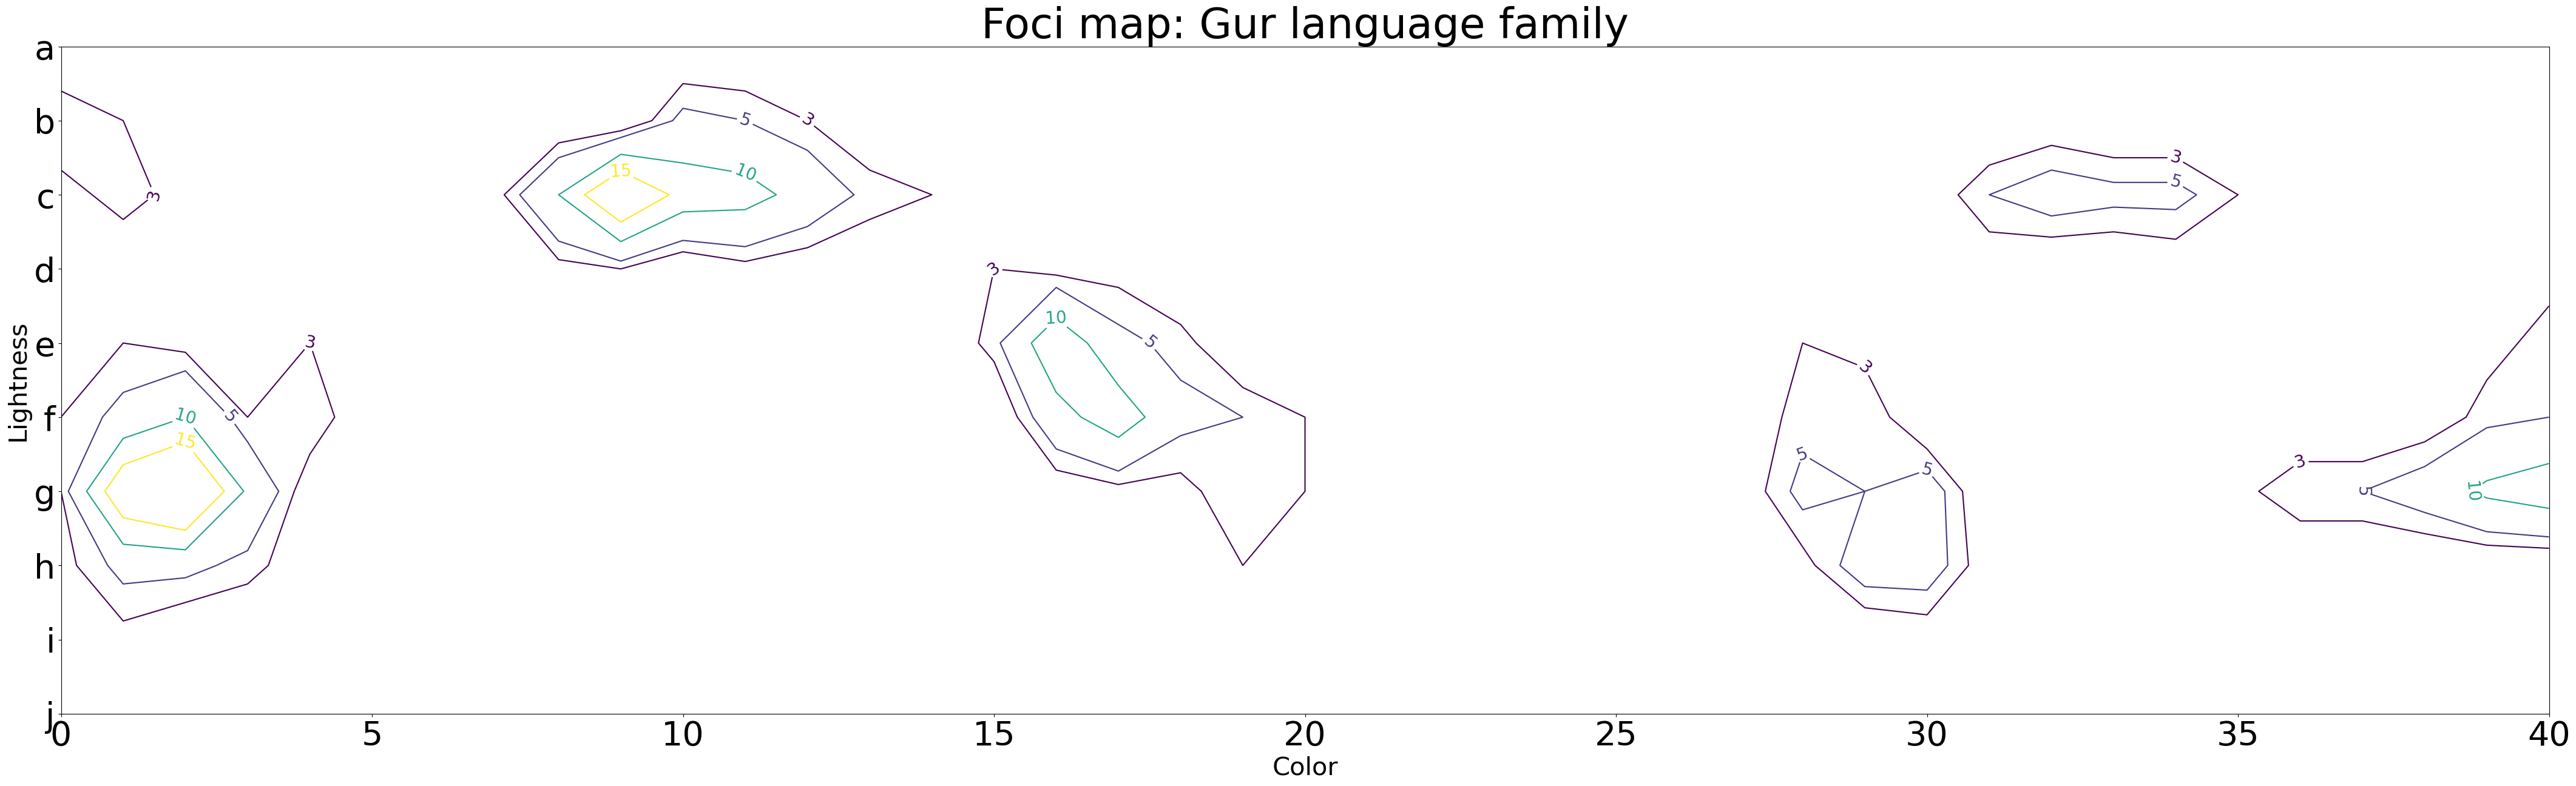

In [13]:
X, Y = np.meshgrid(range(0,41), range(0,10))
fig = plt.figure(figsize=(41, 11))
ax = fig.add_axes([1,1,1,1])

cp = ax.contour(X, Y, matr_gur,levels=[3,5,10,15])
ax.clabel(cp, inline=True, fontsize=20)
ax.set_yticklabels(["j","i","h","g","f","e","d","c","b","a"])
ax.set_title('Foci map: Gur language family',fontsize=50)
ax.set_xlabel('Color',fontsize = 30)
ax.set_ylabel('Lightness',fontsize = 30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.savefig('gur.png')